<a href="https://colab.research.google.com/github/Zauralochka/ML-ZoomCamp/blob/main/HW3_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

### Data set 

In this homework, I will use the California Housing Prices data from Kaggle.

Here's a wget-able link:

https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2022-09-27 10:13:04--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2022-09-27 10:13:04 (35.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
df = pd.read_csv('housing.csv')

In [65]:
df.shape

(16512, 12)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Select following features for the homework

* `'latitude',`
* `'longitude',`
* `'housing_median_age',`
* `'total_rooms',`
* `'total_bedrooms',`
* `'population',`
* `'households',`
* `'median_income',`
* `'median_house_value',`
* `'ocean_proximity'`




In [7]:
features = ['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

In [8]:
df = df[features]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data preparation
* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.


In [9]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in the column total_bedrooms, I fill them with 0

In [10]:
df_full = df.fillna(0)

In [11]:
df_full.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There are no missing vallues now. Let's create new features

In [12]:
df_full['rooms_per_household'] = df_full['total_rooms']/df_full['households']
df_full['bedrooms_per_room'] = df_full['total_bedrooms'] / df_full['total_rooms']
df_full['population_per_household'] = df_full['population'] / df_full['households']

In [13]:
df_full.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [14]:
df_full['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

 **Answer:** < 1 H Ocean 

### Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that `the train_test_split function` and set the seed to 42.
* Make sure that the target value `median_house_value` is not in your dataframe.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df_full, test_size=0.2, random_state=42)

In [17]:
len(df_full_train), len(df_test)

(16512, 4128)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [22]:
y_test.sum()

848305278.0

## Question 2
* Create the correlation matrix for the numerical features of your train dataset.
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [23]:
df_full.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [24]:
df_full.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [25]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [26]:
numerical_without_target = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_household','bedrooms_per_room', 'population_per_household']

In [27]:
categorical = ['ocean_proximity']

In [28]:
df_full_train.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924485,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983,0.110695,-0.118938,0.005837
longitude,-0.924485,1.000000,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349,-0.029339,0.097280,-0.000598
housing_median_age,0.005296,-0.101818,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706,-0.160892,0.135495,0.016245
total_rooms,-0.029224,0.038676,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989,0.136090,-0.189316,-0.024991
total_bedrooms,-0.059998,0.063064,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980,-0.001659,0.084149,-0.028536
population,-0.102499,0.094276,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032,-0.073733,0.035134,0.072330
households,-0.064061,0.049306,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714,-0.083062,0.064185,-0.027656
median_income,-0.076571,-0.017040,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647,0.336013,-0.616669,0.022061
median_house_value,-0.142983,-0.046349,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000,0.158485,-0.257419,-0.022030
rooms_per_household,0.110695,-0.029339,-0.160892,0.136090,-0.001659,-0.073733,-0.083062,0.336013,0.158485,1.000000,-0.435169,-0.004922


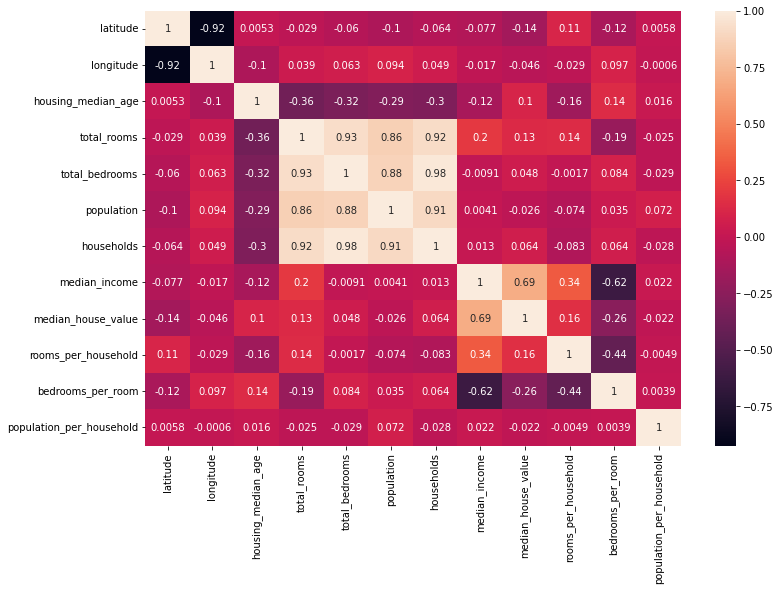

In [29]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(df_full_train,columns=numerical)
fig, ax = plt.subplots(figsize=(12, 8))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Options:

* `total_bedrooms` and `households` - 0.98
* `total_bedrooms` and `total_rooms` - 0.93
* `population` and `households` - 0.91
* `population_per_household` and `total_rooms` - -0.029

So the biggest correlation is between `total_bedrooms` and `households`

### Make median_house_value binary
* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable above_average which is 1 if the `median_house_value` is above its mean value and 0 otherwise.


In [30]:
mean_house_value = df['median_house_value'].mean()
mean_house_value

207194.6937378876

In [31]:
y_train = (y_train > mean_house_value).astype(int)
y_val = (y_val > mean_house_value).astype(int)
y_test = (y_test > mean_house_value).astype(int)

In [32]:
y_test.sum()

1651

## Question 3
* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
mutual_info = mutual_info_score(df_train['ocean_proximity'], y_train)
mutual_info

0.10076505108327255

In [35]:
round(mutual_info, 2)

0.1

Options:

* 0.26
* 0
* 0.10
* 0.16

**Answer:** 0.10

## Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of 
* Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [36]:
df_train.head().T

,0,1,2,3,4
latitude,34.43,33.74,39.13,34.24,37.52
longitude,-119.67,-118.32,-121.62,-118.63,-122.3
housing_median_age,39.0,24.0,41.0,9.0,38.0
total_rooms,1467.0,6097.0,1317.0,4759.0,2769.0
total_bedrooms,381.0,794.0,309.0,924.0,387.0
population,1404.0,2248.0,856.0,1884.0,994.0
households,374.0,806.0,337.0,915.0,395.0
median_income,2.3681,10.1357,1.6719,4.8333,5.5902
ocean_proximity,<1H OCEAN,NEAR OCEAN,INLAND,<1H OCEAN,NEAR OCEAN
rooms_per_household,3.92246,7.564516,3.908012,5.201093,7.010127


In [37]:
# one-hot encoding
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical_without_target].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical_without_target].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [38]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

### Train logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [40]:
y_train.sum()

5034

In [41]:
model.intercept_[0]

-0.056090056616001444

In [42]:
model.coef_[0].round(3)

array([ 0.096,  0.004,  0.036,  0.092,  0.08 ,  1.204,  0.453, -1.563,
        0.01 ,  0.32 ,  0.723, -0.002,  0.01 , -0.021,  0.002, -0.   ])

In [43]:
y_pred = model.predict_proba(X_val)[:, 1]

In [44]:
y_pred

array([0.08747751, 0.1461806 , 0.95345435, ..., 0.95832574, 0.85030259,
       0.46754684])

In [45]:
more_than_average = (y_pred > 0.5) 
more_than_average.mean()

0.40261627906976744

In [46]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = more_than_average.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = (df_pred['prediction'] == df_pred['actual'])

In [47]:
df_pred

,probability,prediction,actual,correct
0,0.087478,0,0,True
1,0.146181,0,0,True
2,0.953454,1,1,True
3,0.494874,0,1,False
4,0.979816,1,1,True
...,...,...,...,...
4123,0.052546,0,0,True
4124,0.986236,1,1,True
4125,0.958326,1,1,True
4126,0.850303,1,1,True


In [48]:
accuracy_full_set = df_pred.correct.mean()
accuracy_full_set

0.8367248062015504

Options:

* 0.60
* 0.72
* 0.84
* 0.95

In [50]:
round(df_pred.correct.mean(), 2)

0.84

**Answer:** 0.84

### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
`total_rooms`
`total_bedrooms`
`population`
`households`
note: the difference doesn't have to be positive

In [97]:
# feature elimination
from sklearn.metrics import mutual_info_score
def mutual_info_median_price(series):
    return mutual_info_score(series, df_full['median_house_value'])

In [100]:
import warnings
warnings.filterwarnings('ignore')

mi = df_full.apply(mutual_info_median_price)
mi.sort_values(ascending=False)

median_house_value          7.698164
rooms_per_household         7.597825
population_per_household    7.552924
bedrooms_per_room           7.549771
median_income               6.923324
total_rooms                 6.162212
population                  5.667924
total_bedrooms              4.777711
households                  4.722244
longitude                   4.016993
latitude                    3.856316
housing_median_age          1.864962
ocean_proximity             0.472584
dtype: float64

In [69]:
full_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [70]:
# created list of list that contain one less feature
features = []
for i in range(len(full_features)):
    features.append(full_features[:i] + full_features[i+1:])
features

[['longitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'ocean_proximity',
  'rooms_per_household',
  'bedrooms_per_room',
  'population_per_household'],
 ['latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'ocean_proximity',
  'rooms_per_household',
  'bedrooms_per_room',
  'population_per_household'],
 ['latitude',
  'longitude',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'ocean_proximity',
  'rooms_per_household',
  'bedrooms_per_room',
  'population_per_household'],
 ['latitude',
  'longitude',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'ocean_proximity',
  'rooms_per_household',
  'bedrooms_per_room',
  'population_per_household'],
 ['latitude',
  'longitude',
  'housing_median_age',
  'total_rooms',
  'population',
  'households',
  'm

In [71]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [73]:
accuracy = []
for i in range(len(features)):
    train_dict = df_train[features[i]].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[features[i]].to_dict(orient='records')
    X_val = dv.fit_transform(val_dict)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    more_than_average = (y_pred > 0.5) 
    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = more_than_average.astype(int)
    df_pred['actual'] = y_val
    df_pred['correct'] = (df_pred['prediction'] == df_pred['actual'])
    accuracy.append(df_pred.correct.mean())
print(accuracy)   

[0.8338178294573644, 0.8333333333333334, 0.8294573643410853, 0.8374515503875969, 0.8364825581395349, 0.8267926356589147, 0.8330910852713178, 0.7868217054263565, 0.8204941860465116, 0.8357558139534884, 0.8359980620155039, 0.8372093023255814]


In [80]:
difference = abs((np.array(accuracy) - accuracy_full_set)).min()
difference

0.00024224806201555982

In [91]:
diff = abs(np.array(accuracy) - accuracy_full_set)
diff

array([0.00290698, 0.00339147, 0.00726744, 0.00072674, 0.00024225,
       0.00993217, 0.00363372, 0.0499031 , 0.01623062, 0.00096899,
       0.00072674, 0.0004845 ])

In [92]:
diff.argmin()

4

In [95]:
list(set(full_features) - set(features[4]))

['total_bedrooms']

## Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
*Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
*If there are multiple options, select the smallest alpha.

Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [102]:
df = df.copy()

In [112]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [113]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [107]:
df.isna().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

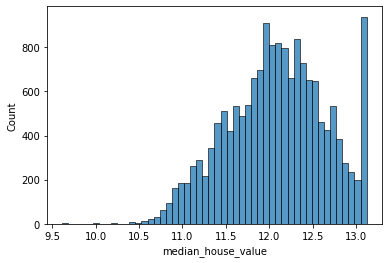

In [103]:
prices_log = np.log1p(df['median_house_value'])
prices_log

sns.histplot(prices_log, bins=50)

## Split data

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## One-hot encoding

In [114]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [115]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Train model

In [116]:
from sklearn.linear_model import Ridge

In [119]:
a = [0, 0.01, 0.1, 1, 10]

for i in a:
    model = Ridge(alpha=i, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    print(score)

0.5346788764866932
0.5346788764960461
0.5346788765858262
0.5346788774854866
0.5346788864820742


The best result is with a = 1, but if we round it up to 3 decimal points they are all the same 0.535